In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,10)})

### Load Data

In [51]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [30]:
train.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### EDA

#### Response: Saleprice

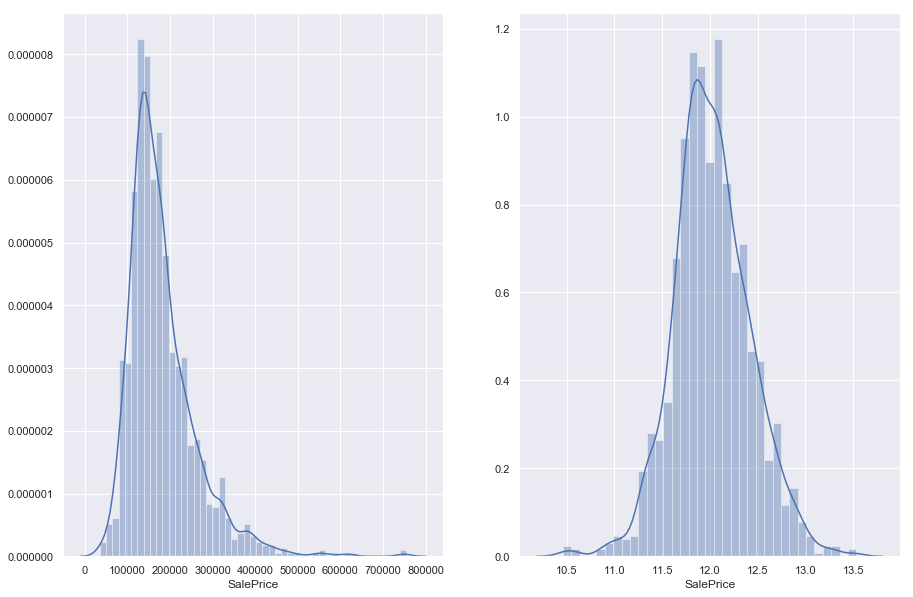

In [49]:
_, (ax1, ax2) = plt.subplots(figsize=(15,10), ncols=2)
sns.distplot(train['SalePrice'], ax=ax1)
sns.distplot(np.log(train['SalePrice']), ax=ax2)

#### Predictors: Categorical, Numerical and Ordinal

In [172]:
cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 
      'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
      'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
      'MasVnrType', 'Foundation','BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'GarageType',
      'MoSold', 'SaleType', 'SaleCondition', 'MiscFeature']

num = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'YrSold', 'MiscVal']
ordinal = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual','OverallCond',
          'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
           'HeatingQC', 'Electrical', 'KitchenQual', 
           'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
           'PavedDrive', 'PoolQC', 'Fence']

##### Categoricals

In [173]:
train[cat].head()

,MSSubClass,MSZoning,Street,Alley,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,...,Foundation,BsmtFinType1,BsmtFinType2,Heating,CentralAir,GarageType,MoSold,SaleType,SaleCondition,MiscFeature
0,60,RL,Pave,NaN,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,PConc,GLQ,Unf,GasA,Y,Attchd,2,WD,Normal,NaN
1,20,RL,Pave,NaN,Lvl,FR2,Veenker,Feedr,Norm,1Fam,...,CBlock,ALQ,Unf,GasA,Y,Attchd,5,WD,Normal,NaN
2,60,RL,Pave,NaN,Lvl,Inside,CollgCr,Norm,Norm,1Fam,...,PConc,GLQ,Unf,GasA,Y,Attchd,9,WD,Normal,NaN
3,70,RL,Pave,NaN,Lvl,Corner,Crawfor,Norm,Norm,1Fam,...,BrkTil,ALQ,Unf,GasA,Y,Detchd,2,WD,Abnorml,NaN
4,60,RL,Pave,NaN,Lvl,FR2,NoRidge,Norm,Norm,1Fam,...,PConc,GLQ,Unf,GasA,Y,Attchd,12,WD,Normal,NaN


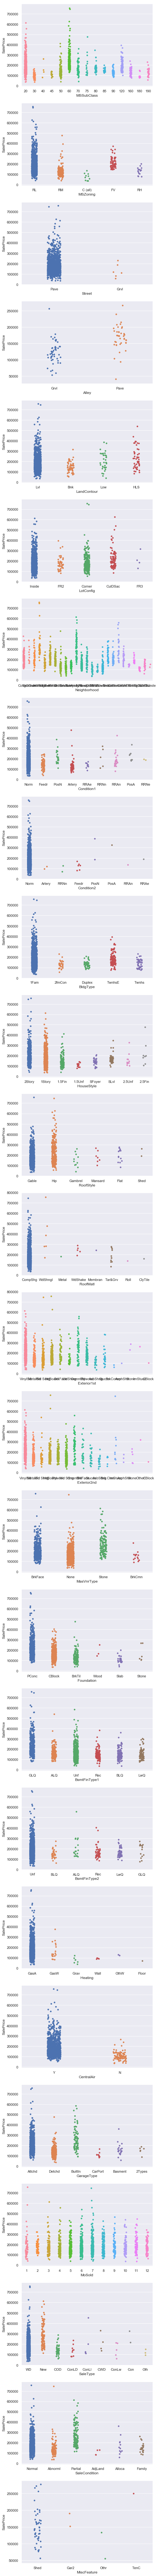

In [174]:
_, axes = plt.subplots(nrows=len(cat), figsize=(7.5, 150))
for idx, c in enumerate(cat):
    ax = sns.stripplot(x=c, y='SalePrice', data=train, ax=axes[idx])

In [175]:
train[cat].isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
Foundation          0
BsmtFinType1       37
BsmtFinType2       38
Heating             0
CentralAir          0
GarageType         81
MoSold              0
SaleType            0
SaleCondition       0
MiscFeature      1406
dtype: int64

##### Ordinals

In [147]:
train[ordinal].head()

,LotShape,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,Electrical,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
0,Reg,AllPub,Gtl,7,5,Gd,TA,Gd,TA,No,...,SBrkr,Gd,Typ,NaN,RFn,TA,TA,Y,NaN,NaN
1,Reg,AllPub,Gtl,6,8,TA,TA,Gd,TA,Gd,...,SBrkr,TA,Typ,TA,RFn,TA,TA,Y,NaN,NaN
2,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,Mn,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN
3,IR1,AllPub,Gtl,7,5,TA,TA,TA,Gd,No,...,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y,NaN,NaN
4,IR1,AllPub,Gtl,8,5,Gd,TA,Gd,TA,Av,...,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NaN,NaN


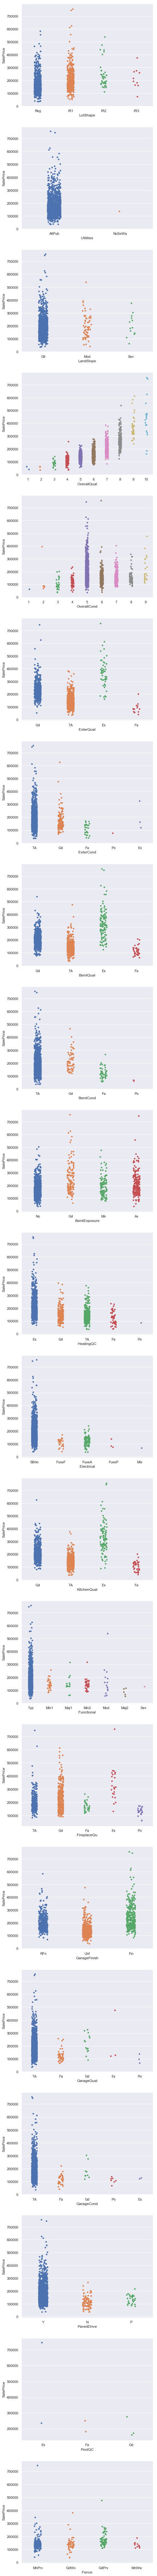

In [148]:
_, axes = plt.subplots(nrows=len(ordinal), figsize=(7.5, 150))
for idx, c in enumerate(ordinal):
    ax = sns.stripplot(x=c, y='SalePrice', data=train, ax=axes[idx])

In [149]:
train[ordinal].isna().sum()

LotShape           0
Utilities          0
LandSlope          0
OverallQual        0
OverallCond        0
ExterQual          0
ExterCond          0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
HeatingQC          0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
PoolQC          1453
Fence           1179
dtype: int64

##### Numericals

In [176]:
train[num].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,MiscVal
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,2008,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,2007,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,2008,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,2006,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,2008,0


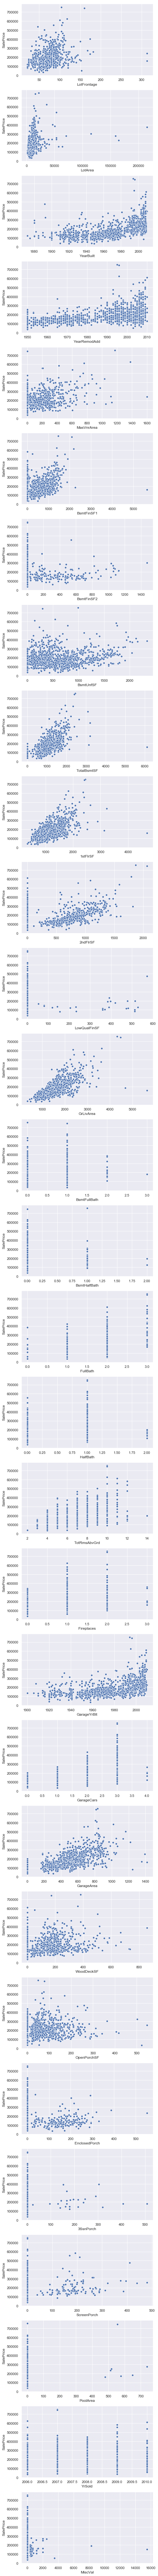

In [177]:
_, axes = plt.subplots(nrows=len(num), figsize=(7.5, 150))
for idx, c in enumerate(num):
    ax = sns.scatterplot(x=c, y='SalePrice', data=train, ax=axes[idx])

In [178]:
train[num].isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
YrSold             0
MiscVal            0
dtype: int64

In [154]:
(train[num] == 0).sum()

LotFrontage         0
LotArea             0
YearBuilt           0
YearRemodAdd        0
MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
TotRmsAbvGrd        0
Fireplaces        690
GarageYrBlt         0
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
YrSold              0
dtype: int64

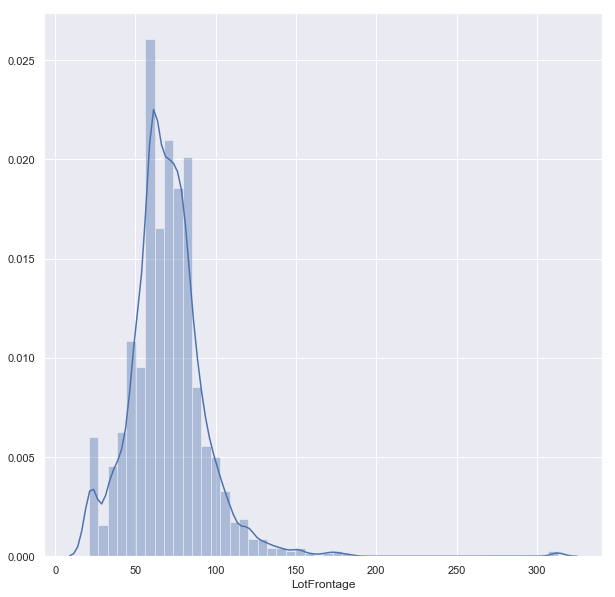

In [157]:
sns.distplot(train['LotFrontage'].dropna())

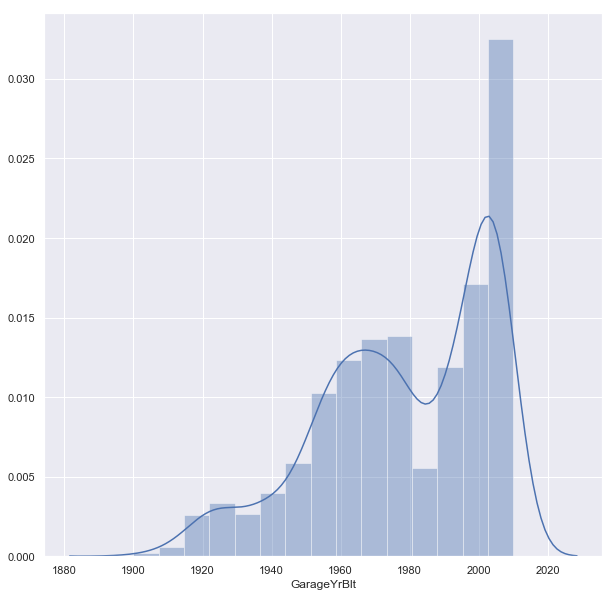

In [158]:
sns.distplot(train['GarageYrBlt'].dropna())

### Preprocessing

- impute missing data
- re-code ordinal predictors
- log transform SalePrice
- re-code categoricals
- ?remove outliers

In [226]:
def impute_missing(X):
    df = X.copy()
    # categoricals
    df['Alley'] = df['Alley'].fillna('missing')
    df['GarageType'] = df['GarageType'].fillna('missing')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('missing')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('missing')
    df['MiscFeature'] = df['MiscFeature'].fillna('missing')
    # ordinals
    df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
    df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
    df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
    df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
    df['Electrical'] =  df['Electrical'].mode()[0]
    # .. garage/pool/fence NAs, correspond to no garage/pool/fence according to data_description.txt
    df['GarageFinish'] = df['GarageFinish'].fillna('NA')
    df['GarageCond'] = df['GarageCond'].fillna('NA')
    df['GarageQual'] = df['GarageQual'].fillna('NA')
    df['PoolQC'] = df['PoolQC'].fillna('NA')
    df['Fence'] = df['Fence'].fillna('NA')
    # numericals
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()) # is there a better way.. feature engineer year bins and never?
    return df    

In [235]:
def qual_ordinal_score(x):
    '''BsmtQual, GarageQual, PoolQC, FireplaceQu, BsmtCond, GarageCond'''
    if x == 'Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x =='Fa':
        return 2
    elif x =='Po':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))

def bsmt_exposure_ordinal_score(x):
    '''BsmtExposure'''
    if x == 'Gd':
        return 4
    elif x == 'Av':
        return 3
    elif x =='Mn':
        return 2
    elif x =='No':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def garage_finish_ordinal_score(x):
    '''GarageFinish'''
    if x == 'Fin':
        return 3
    elif x == 'RFn':
        return 2
    elif x =='Unf':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def fence_ordinal_score(x):
    '''Fence'''
    if x == 'GdPrv':
        return 4
    elif x == 'MnPrv':
        return 3
    elif x =='GdWo':
        return 2
    elif x == 'MnWw':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
    
def lot_shape_ordinal_score(x):
    '''LotShape'''
    if x == 'Reg':
        return 0
    elif x == 'IR1':
        return 1
    elif x =='IR2':
        return 2
    elif x == 'IR3':
        return 3
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def utilites_ordinal(x):
    '''Utilities'''
    if x == 'AllPub':
        return 3
    elif x == 'NoSewr':
        return 2
    elif x =='NoSeWa':
        return 1
    elif x == 'ELO':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
    
def land_slope_ordinal(x):
    '''LandSlope'''
    if x == 'Gtl':
        return 0
    elif x == 'Mod':
        return 1
    elif x =='Sev':
        return 2
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def electrical_ordinal(x):
    '''Electrical'''
    if x == 'SBrkr':
        return 4
    elif x == 'FuseA':
        return 3
    elif x =='FuseF':
        return 2
    elif x == 'FuseP':
        return 1
    elif x == 'Mix':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))

def functional_ordinal(x):
    '''Functional'''
    if x == 'Typ':
        return 7
    elif x == 'Min1':
        return 6
    elif x =='Min2':
        return 5
    elif x =='Mod':
        return 4
    elif x == 'Maj1':
        return 3
    elif x == 'Maj2':
        return 2
    elif x == 'Sev':
        return 1
    elif x == 'Sal':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))    

def paved_ordinal(x):
    '''PavedDrive'''
    if x == 'Y':
        return 2
    elif x == 'P':
        return 1
    elif x == 'N':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))    
    
def encode_ordinals(X):
    df = X.copy()
    df['LotShape'] = df['LotShape'].apply(lot_shape_ordinal_score)
    df['Utilities'] = df['Utilities'].apply(utilites_ordinal)
    df['LandSlope'] = df['LandSlope'].apply(land_slope_ordinal)
    df['BsmtQual'] = df['BsmtQual'].apply(qual_ordinal_score)
    df['BsmtCond'] = df['BsmtCond'].apply(qual_ordinal_score)     
    df['BsmtExposure'] = df['BsmtExposure'].apply(bsmt_exposure_ordinal_score)   
    df['HeatingQC'] = df['HeatingQC'].apply(qual_ordinal_score)
    df['Electrical'] = df['Electrical'].apply(electrical_ordinal)
    df['KitchenQual'] = df['KitchenQual'].apply(qual_ordinal_score)     
    df['Functional'] = df['Functional'].apply(functional_ordinal)     
    df['FireplaceQu'] = df['FireplaceQu'].apply(qual_ordinal_score)     
    df['GarageFinish'] = df['GarageFinish'].apply(garage_finish_ordinal_score)   
    df['GarageQual'] = df['GarageQual'].apply(qual_ordinal_score)
    df['GarageCond'] = df['GarageCond'].apply(qual_ordinal_score)     
    df['PavedDrive'] = df['PavedDrive'].apply(paved_ordinal)
    df['PoolQC'] = df['PoolQC'].apply(qual_ordinal_score)
    df['Fence'] = df['Fence'].apply(fence_ordinal_score)       
    return df

In [236]:
X = impute_missing(train)
X = encode_ordinals(X)

In [220]:
train['OverallCond']

0       5
1       8
2       5
3       5
4       5
5       5
6       5
7       6
8       5
9       6
10      5
11      5
12      6
13      5
14      5
15      8
16      7
17      5
18      5
19      6
20      5
21      7
22      5
23      7
24      8
25      5
26      7
27      5
28      6
29      6
       ..
1430    5
1431    6
1432    6
1433    5
1434    5
1435    9
1436    6
1437    5
1438    7
1439    6
1440    7
1441    5
1442    5
1443    6
1444    5
1445    5
1446    7
1447    5
1448    7
1449    7
1450    5
1451    5
1452    5
1453    5
1454    5
1455    5
1456    6
1457    9
1458    6
1459    6
Name: OverallCond, Length: 1460, dtype: int64